In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('sample_submission.csv')

In [4]:
df.sample()

,ImageId,Label
6628,6629,0


In [5]:
df1=pd.read_csv('train.csv')

In [6]:
df1.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34611,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2=pd.read_csv('test.csv')

In [8]:
df2.sample()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df1.shape

(42000, 785)

In [11]:
import matplotlib.pyplot as plt 

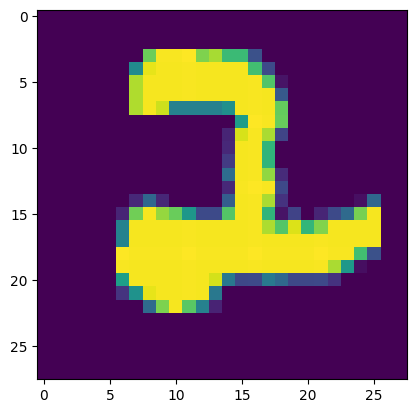

In [12]:
plt.imshow(df1.iloc[15102,1:].values.reshape(28,28))

In [13]:
X=df1.iloc[:,1:]
Y=df1.iloc[:,0]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
X_train.shape

(33600, 784)

In [17]:
X_test.shape

(8400, 784)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier()

In [20]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [21]:
Y_pred=knn.predict(X_test.values)

c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9680952380952381

# Application of PCA

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)


In [26]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [27]:
X_train.shape

(33600, 100)

In [28]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [29]:
Y_pred=knn.predict(X_test)  

In [30]:
accuracy_score(Y_test,Y_pred)

0.9548809523809524

In [31]:
for i in range (1,785):
    pca=PCA(n_components=100)
    X_train=pca.fit_transform(X_train)
    X_test=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)  
    accuracy_score(Y_test,Y_pred)

In [32]:
# tells about the eigen values
pca.explained_variance_

array([40.64115119, 29.26140855, 26.64277388, 20.84894707, 18.03531643,
       15.82295721, 13.88334017, 12.53229211, 11.10949945, 10.07616814,
        9.65806585,  8.67741388,  8.02409536,  7.90593366,  7.46582242,
        7.17589505,  6.7382933 ,  6.60515836,  6.46970305,  6.29960584,
        5.95009114,  5.75937714,  5.53551167,  5.3241188 ,  5.1687217 ,
        4.96002379,  4.91206524,  4.75015497,  4.48940293,  4.39081292,
        4.34224723,  4.28171956,  4.13649395,  4.05154791,  4.0292887 ,
        3.91853189,  3.84318549,  3.7037132 ,  3.59913738,  3.51585492,
        3.44741581,  3.41199455,  3.29474142,  3.27649931,  3.19104433,
        3.16647796,  3.14925788,  3.1186912 ,  3.0416904 ,  2.98430546,
        2.88553669,  2.85949227,  2.82336132,  2.78528367,  2.75410208,
        2.65936711,  2.61443916,  2.60491714,  2.53138865,  2.50796852,
        2.43459829,  2.42400721,  2.38520741,  2.36534434,  2.3532208 ,
        2.30744739,  2.29139745,  2.21980203,  2.21594144,  2.18

In [33]:
# tells about the eigen vectors
pca.components_

array([[ 1.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.88737914e-15, ...,
         7.26772820e-17,  1.89490455e-18, -3.61177668e-17],
       [-0.00000000e+00, -2.32799890e-15,  1.00000000e+00, ...,
        -9.84709462e-17,  1.62270334e-18, -7.26211058e-20],
       ...,
       [-0.00000000e+00,  6.24500451e-17, -6.93889390e-17, ...,
         1.00000000e+00,  1.52463258e-13, -1.95399252e-14],
       [ 0.00000000e+00, -1.89490455e-18, -1.62270334e-18, ...,
        -1.52462688e-13,  1.00000000e+00,  1.65702977e-14],
       [-0.00000000e+00,  2.77555756e-17,  4.51028104e-17, ...,
         2.02060590e-14, -1.65703124e-14,  1.00000000e+00]])

In [34]:
# tells about the variance ratio or we can say the percentage explanation
pca.explained_variance_ratio_

array([0.08081207, 0.05818425, 0.05297728, 0.04145666, 0.03586196,
       0.03146284, 0.02760604, 0.02491958, 0.02209046, 0.02003575,
       0.01920438, 0.01725443, 0.01595535, 0.01572039, 0.01484526,
       0.01426876, 0.01339862, 0.01313389, 0.01286455, 0.01252632,
       0.01183134, 0.01145212, 0.01100698, 0.01058664, 0.01027764,
       0.00986266, 0.0097673 , 0.00944535, 0.00892686, 0.00873082,
       0.00863425, 0.0085139 , 0.00822513, 0.00805622, 0.00801196,
       0.00779172, 0.0076419 , 0.00736457, 0.00715663, 0.00699103,
       0.00685494, 0.00678451, 0.00655136, 0.00651509, 0.00634517,
       0.00629632, 0.00626208, 0.0062013 , 0.00604819, 0.00593408,
       0.00573769, 0.0056859 , 0.00561406, 0.00553834, 0.00547634,
       0.00528796, 0.00519863, 0.00517969, 0.00503349, 0.00498692,
       0.00484103, 0.00481997, 0.00474282, 0.00470332, 0.00467921,
       0.0045882 , 0.00455628, 0.00441392, 0.00440624, 0.00434801,
       0.00429268, 0.004221  , 0.00421506, 0.00417778, 0.00412

In [35]:
np.cumsum(pca.explained_variance_ratio_) # cumulative sum of the variance ratio

array([0.08081207, 0.13899632, 0.1919736 , 0.23343026, 0.26929222,
       0.30075506, 0.3283611 , 0.35328068, 0.37537114, 0.39540689,
       0.41461128, 0.4318657 , 0.44782105, 0.46354144, 0.47838671,
       0.49265547, 0.50605409, 0.51918798, 0.53205253, 0.54457885,
       0.55641019, 0.56786231, 0.57886928, 0.58945592, 0.59973356,
       0.60959622, 0.61936351, 0.62880886, 0.63773572, 0.64646655,
       0.6551008 , 0.6636147 , 0.67183982, 0.67989604, 0.687908  ,
       0.69569972, 0.70334163, 0.7107062 , 0.71786283, 0.72485386,
       0.7317088 , 0.73849332, 0.74504468, 0.75155977, 0.75790493,
       0.76420125, 0.77046333, 0.77666463, 0.78271281, 0.7886469 ,
       0.79438458, 0.80007048, 0.80568454, 0.81122288, 0.81669921,
       0.82198718, 0.82718581, 0.8323655 , 0.83739899, 0.84238591,
       0.84722694, 0.8520469 , 0.85678972, 0.86149304, 0.86617226,
       0.87076045, 0.87531673, 0.87973065, 0.8841369 , 0.88848491,
       0.89277759, 0.8969986 , 0.90121365, 0.90539143, 0.90951

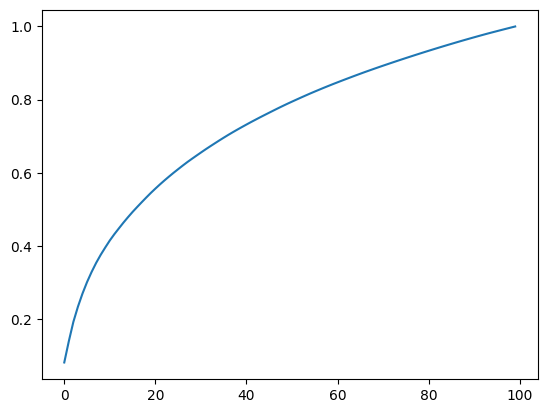

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # plot of the cumulative sum of the variance ratio